# 1. Data set up


## 1.1 Load Data

Please upload both datasets (any file format is ok) to your google drive, and load the datasets through google drive file id in your code. If you want to use Jupyter, please submit all the dataset in an additional zip file.




In [1]:
#Import the needed libraires  
import os
import fnmatch
import numpy as np
import nltk 
from nltk.cluster import KMeansClusterer, euclidean_distance
from nltk.cluster.kmeans import KMeansClusterer
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline 
import numpy as np
from sklearn.metrics import davies_bouldin_score
from collections import OrderedDict
import matplotlib.pyplot as plt
from PIL import Image
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import homogeneity_completeness_v_measure

### Dataset 1

In [2]:
#Data Setup (Load and Preprocessing) for Yale Face Dataset B 
#
file_location =[]
img_class=[]
X=[]
X2=[]
directory = r"CroppedYale"
#Loop over the folder and read ever image in it 
for path,dirs,files in os.walk(directory):
        for filename in files:
            if fnmatch.fnmatch(filename,"*.pgm"):
                with Image.open (os.path.join(path, filename))as f:
                    file_location .append(path[-7:])
                    #To extract the  label for every image which = yaleB??
                    img_class.append(path[49:56])
                    beach = np.asarray(f)
                    #the dataset with out using PCA
                    X2.append(beach)
                    #the dataset using PCA
                    pca = PCA(n_components=7, svd_solver='full')
                    beach2=pca.fit_transform(beach)
                    X.append(beach2)
                    continue
            else:
                    continue
                
#Reshape the two data set to be suitable to pass it to different cluster algorithms                    
x = np.array(X)
x2=np.array(X2)
nsamples, nx, ny = x.shape
x = x.reshape((nsamples,nx*ny))
nsamples, nx2, ny2 = x2.shape
x2 = x2.reshape((nsamples,nx2*ny2))
print(x.shape)
print(x2.shape)
img_class = [1 if i=="yaleB01" else 2 if i=="yaleB02" 
             else 3 if i=="yaleB03"
             else 4 if i=="yaleB04"
             else 5 if i=="yaleB05"
             else 6 if i=="yaleB06"
             else 7 if i=="yaleB07"
             else 8 if i=="yaleB08"
             else 9 if i=="yaleB09"
             else 10 if i=="yaleB10"
             else None for i in img_class]

(650, 1344)
(650, 32256)


### Dataset 2

In [3]:
#load the dataset and ues a Pipeline to get a  sparse dataset to be used as input for diffrent clusters  
amazon_data = open('amazon_book.review', 'r',encoding="utf8")
Lines = amazon_data.readlines()
labels_amazon=[]
words=[]
for q, itme in enumerate(Lines):
        labels_amazon.append(int(itme[-4:-3]))
#get the ture labes for each reviwe 
new_labels_amazon=labels_amazon[0:5501] 
P=0
for  t in Lines:
   for word in Lines[P].split():
       words.append(word.partition(':')[0])
       labels_amazon.append(Lines[P][-4:-3])
   P=P+1


res = list(OrderedDict.fromkeys(words))


pipe = Pipeline([('count', CountVectorizer(vocabulary=res)),
                 ('tfid', TfidfTransformer())]).fit(Lines)
pipe['count'].transform(Lines).toarray()
pipe['tfid'].idf_
x3_amazon=pipe.transform(Lines)

print(pipe.transform(Lines).shape)

(5501, 401727)


In [4]:
#since the dataset is lager ,Using it will yield very poor performance for the cluster algorithm 
#and also it will be very competitional expensive,therefore dimensional reducing algorithm is needed,
#however the PCA is not suitable  for sparse data so I used TruncatedSVD 
pca2 = TruncatedSVD(n_components=10,random_state=0)
x4_amazon=pca2.fit_transform(x3_amazon)



---


# 2. K-means Clustering

## 2.1 Dataset 1

### Train K-means clustering

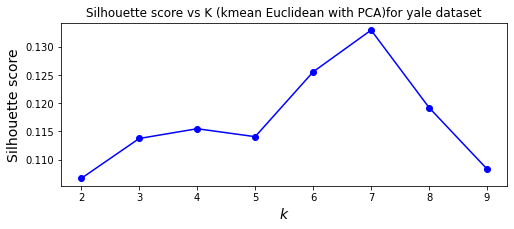

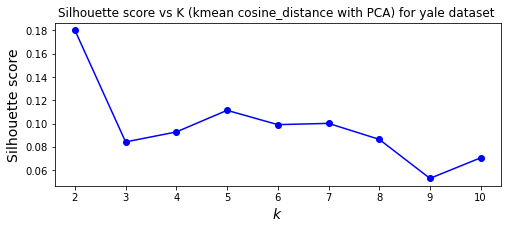

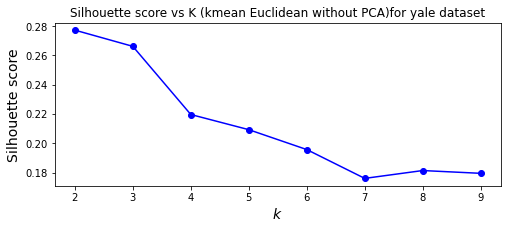

C:\ProgramData\Anaconda3\lib\site-packages\nltk\cluster\util.py:131: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))
C:\ProgramData\Anaconda3\lib\site-packages\nltk\cluster\util.py:131: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


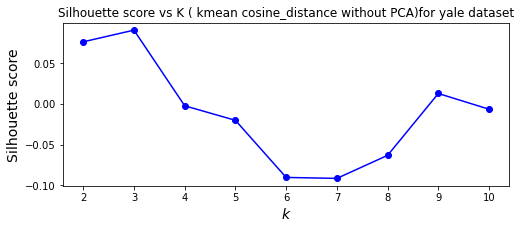

In [5]:
# Kmean Yale Face Dataset B 
## Kmean with Euclidean and pca component 
# To choices the best set of parameter I plot the Silhouette score vs K with different 
#Similarity measure on both arrays (with and without PAC),
#and from the graphs  we can identify the best k and similarity measure 
#the best K and on both dataset (with and without PAC) , and from the graphs  we can identify the best K and  
kmeans_per_k_with_pca = [KMeans(n_clusters=k,init='k-means++', n_init=10, random_state=0).fit(x)
              for k in range(2, 11)]


silhouette_scores = [silhouette_score(x, estimator.labels_)
                     for estimator in kmeans_per_k_with_pca[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title('Silhouette score vs K (kmean Euclidean with PCA)for yale dataset')
plt.show()
#Kmean with cosine_distance and pca component
kclusterer2=[]
silhouette_scores1=[]
for k in range(2, 11 ): 
    i=1
    kclusterer_with_PCA =KMeansClusterer(num_means=k, distance=nltk.cluster.util.cosine_distance, repeats=25)
    assied=kclusterer_with_PCA.cluster(x, assign_clusters=True)
    kclusterer2.append(assied) 

for k in kclusterer2:
    silhouette_scores =silhouette_score(x, k)            
    silhouette_scores1.append(silhouette_scores)
                  
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores1[0:9], "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title('Silhouette score vs K (kmean cosine_distance with PCA) for yale dataset ')
plt.show()


## Kmean with Euclidean  without pca applied
kmeans_per_k_no_pca = [KMeans(n_clusters=k,init='k-means++', n_init=10, random_state=0).fit(x2)
              for k in range(2, 11)]

silhouette_scores2 = [silhouette_score(x2, estimator.labels_)
                     for estimator in kmeans_per_k_no_pca[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores2, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title('Silhouette score vs K (kmean Euclidean without PCA)for yale dataset')
plt.show()
## Kmean with cosine_distance without pca applied
kclusterer3=[]
silhouette_scores3=[]
for k in range(2, 11 ): 
    i=1
    kclusterer_no_pca =KMeansClusterer(num_means=k,avoid_empty_clusters=True, distance=nltk.cluster.util.cosine_distance, repeats=1)
    assied=kclusterer_no_pca.cluster(x2, assign_clusters=True)
    kclusterer3.append(assied) 


for k in kclusterer3:
    silhouette_scores =silhouette_score(x2, k)            
    silhouette_scores3.append(silhouette_scores)
                  
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores3[0:9], "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title('Silhouette score vs K ( kmean cosine_distance without PCA)for yale dataset')
plt.show()

### First evaluation

In [6]:
# as it  can be seen from the above graphs , the best using Kmean is Euclidean without PCA applied and k =2
kmeans_best_Euclidean_without_pca = KMeans(n_clusters=2,init='k-means++', n_init=10, random_state=0).fit(x2)
labels2 = kmeans_best_Euclidean_without_pca.labels_
socer2_bouldin_score=davies_bouldin_score(x2, labels2)
print('Davies-Bouldin for kmean with yale dataset:',socer2_bouldin_score)


Davies-Bouldin for kmean with yale dataset: 1.50260629607196


### Second evaluation

In [7]:
socer2_calinski_harabasz=metrics.calinski_harabasz_score(x2, labels2)
print('calinski-harabasz for kmean with yale dataset :',socer2_calinski_harabasz)

calinski-harabasz for kmean with yale dataset : 265.67754917249135


## 2.2 Dataset 2

### Train K-means clustering

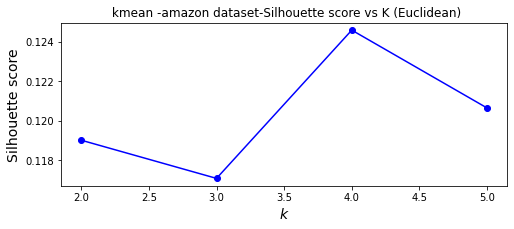

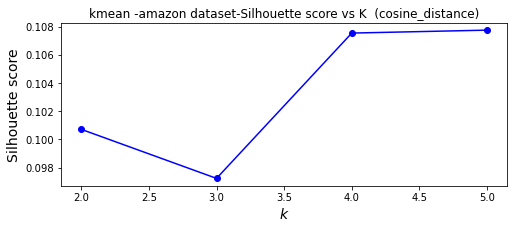

In [8]:
kmeans_amazon_pca = [KMeans(n_clusters=k,init='k-means++', n_init=5, random_state=0).fit(x4_amazon)
              for k in range(2, 7)]

silhouette_scores7 = [silhouette_score(x4_amazon, estimator3.labels_)
                     for estimator3 in kmeans_amazon_pca[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 6), silhouette_scores7, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title(' kmean -amazon dataset-Silhouette score vs K (Euclidean)')
plt.show()
kclusterer8=[]
silhouette_scores9=[]
for k in range(2, 6 ): 
    
    kclusterer_amazon =KMeansClusterer(num_means=k, distance=nltk.cluster.util.cosine_distance, repeats=1)
    assied=kclusterer_amazon.cluster(x4_amazon, assign_clusters=True)
    kclusterer8.append(assied) 

for k in kclusterer8:
    silhouette_scores =silhouette_score(x4_amazon, k)            
    silhouette_scores9.append(silhouette_scores)
                  
plt.figure(figsize=(8, 3))
plt.plot(range(2, 6), silhouette_scores9, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title('kmean -amazon dataset-Silhouette score vs K  (cosine_distance)')
plt.show()

### First evaluation

In [9]:
best_kmean_amazon=KMeans(n_clusters=4,init='k-means++', n_init=5, random_state=0).fit(x4_amazon)
labels7 = best_kmean_amazon.labels_
socer8_bouldin_score=davies_bouldin_score(x4_amazon, labels7)
print('davies_bouldin for Kmean for Amazon dataset:',socer8_bouldin_score)

davies_bouldin for Kmean for Amazon dataset: 2.044691405645887


### Second evaluation 

In [10]:
socer8_calinski_harabasz=metrics.calinski_harabasz_score(x4_amazon, labels7)
print('the calinski-harabasz for Kmean for Amazon dataset:',socer8_calinski_harabasz)

the calinski-harabasz for Kmean for Amazon dataset: 594.7156670567801




---


# 3. Hierachical Clustering

## 3.1 Dataset 1

### Train Hierarchical clustering 

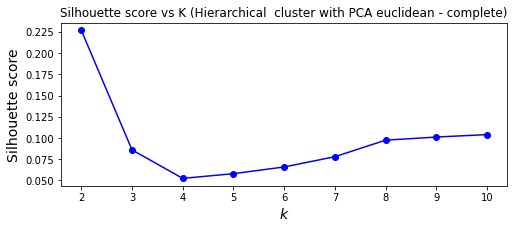

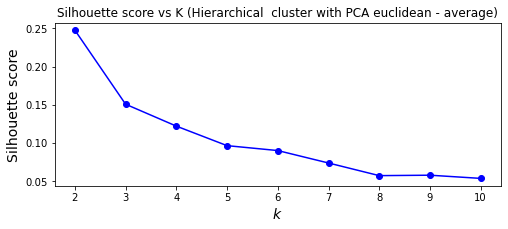

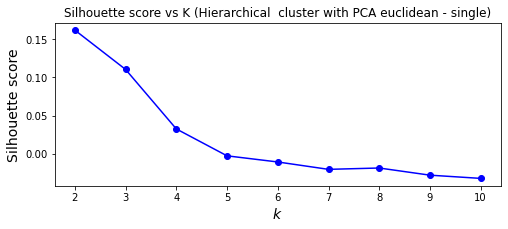

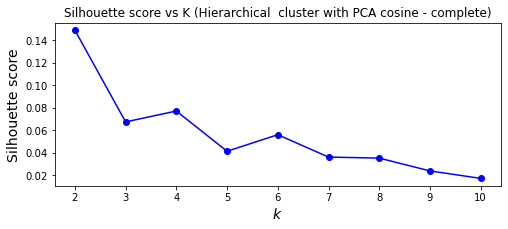

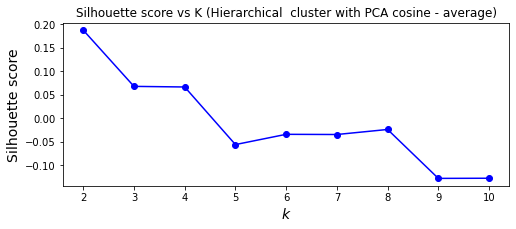

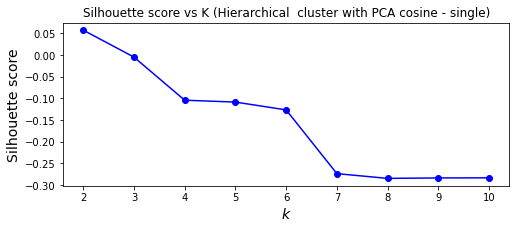

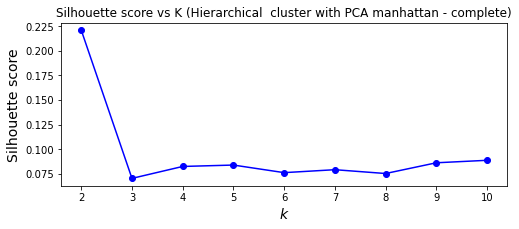

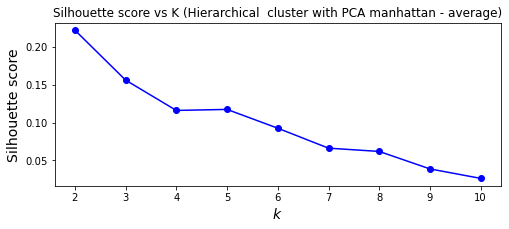

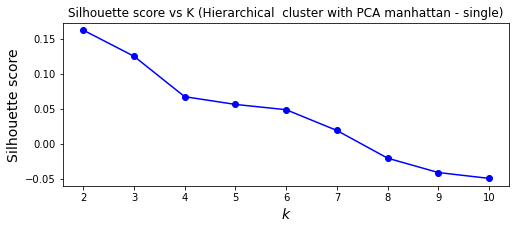

0.24775337632693156


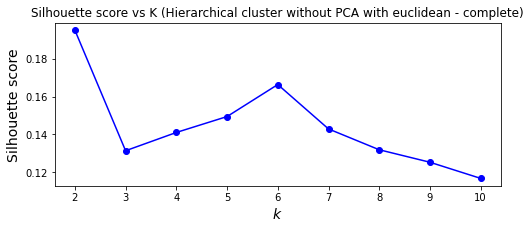

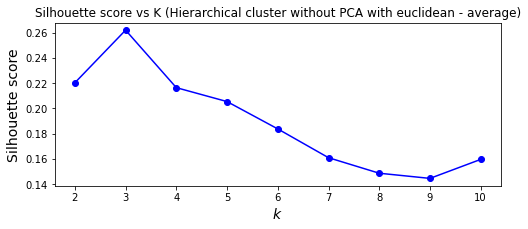

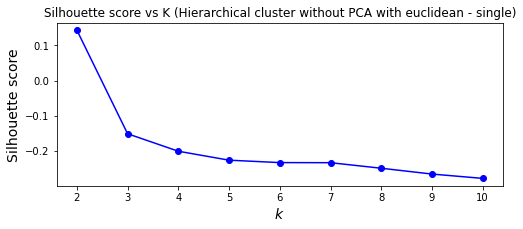

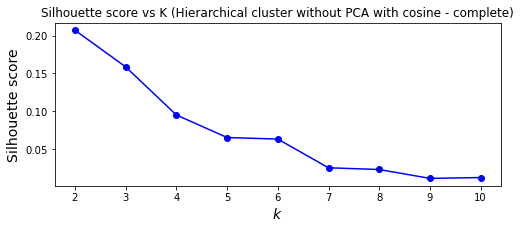

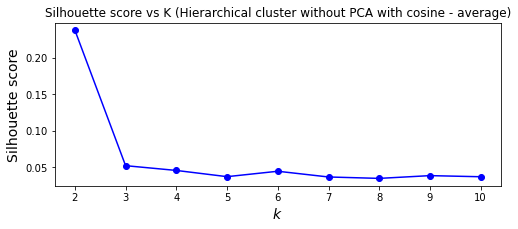

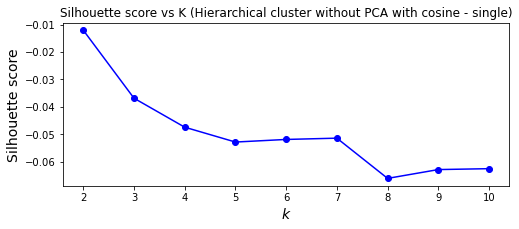

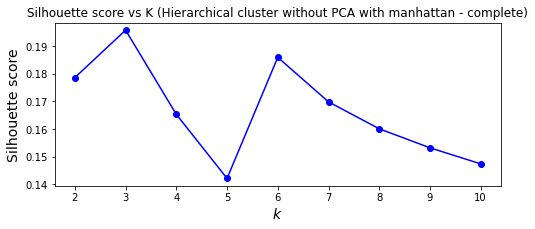

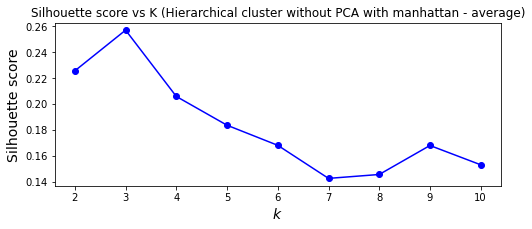

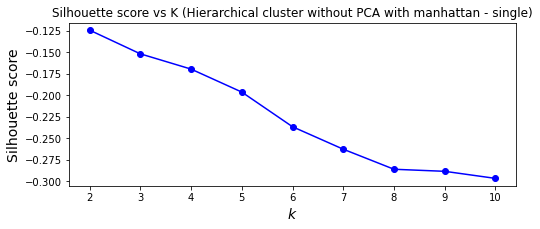

0.2620345245541873


In [11]:
affinity=['euclidean','cosine','manhattan']
linkage=[ 'complete', 'average', 'single']
#Hierarchical cluster with PCA  array 
max_Silhouette_score=[]
for i in affinity:
    for j in linkage:
        # the output of fit function is reverse shape
        #therefore, I used (. T) function  to make the label and x array subtitle for each other
        agglo_k_with_pca = [cluster.FeatureAgglomeration(n_clusters=k,affinity=i,linkage=j ).fit(x.T)
              for k in range(2, 11)]
        silhouette_scores4=[]
        for u in range(0,len( agglo_k_with_pca)):
            thesilhouette_scores = silhouette_score(x, agglo_k_with_pca[u].labels_)
            silhouette_scores4.append(thesilhouette_scores)                   
        plt.figure(figsize=(8, 3))
        plt.plot(range(2, 11), silhouette_scores4, "bo-")
        plt.xlabel("$k$", fontsize=14)
        plt.ylabel("Silhouette score", fontsize=14)
        #to set the title as the affinity and linkage
        title='Silhouette score vs K (Hierarchical  cluster with PCA %s - %s)' %(i, j)
        plt.title(title)
        plt.show()
        max_Silhouette_score.append(max(silhouette_scores4))
#to show which set of  parameter having the highest Silhouette_score to feed it to the best algorithm  
print(max(max_Silhouette_score))
#Hierarchical cluster without PCA  array
max_Silhouette_score2=[]
for i in affinity:
    for j in linkage:
        agglo_k_without_pca = [cluster.FeatureAgglomeration(n_clusters=k,affinity=i,linkage=j ).fit(x2.T)
              for k in range(2, 11)]
        silhouette_scores4=[]
        for u in range(0,len( agglo_k_without_pca)):
            thesilhouette_scores = silhouette_score(x2, agglo_k_without_pca[u].labels_)
            silhouette_scores4.append(thesilhouette_scores)                   
        plt.figure(figsize=(8, 3))
        plt.plot(range(2, 11), silhouette_scores4, "bo-")
        plt.xlabel("$k$", fontsize=14)
        plt.ylabel("Silhouette score", fontsize=14)
        title='Silhouette score vs K (Hierarchical cluster without PCA with %s - %s)' %(i, j)
        plt.title(title)
        plt.show()
        max_Silhouette_score2.append(max(silhouette_scores4))
    
print(max(max_Silhouette_score2))

### First evaluation 

In [12]:
# as it  can be seen from the above graphs and the max_Silhouette_score  , 
#the best  Hierarchical Cluster have  affinity='manhattan',linkage='average' without PCA applied and k =3
best_without_pca_Hierarchical=cluster.FeatureAgglomeration(n_clusters=3,affinity='manhattan',linkage='average').fit(x2.T)
labels4 = best_without_pca_Hierarchical.labels_
socer4_bouldin_score=davies_bouldin_score(x2, labels4)
print('Davies-Bouldin for Hierarchical Cluster with yale dataset:',socer4_bouldin_score)

Davies-Bouldin for Hierarchical Cluster with yale dataset: 1.238208042545974


### Second evaluation 

In [13]:
socer4_calinski_harabasz=metrics.calinski_harabasz_score(x2, labels4)
print('calinski-harabasz for Hierarchical Cluster with yale dataset:',socer4_calinski_harabasz)

calinski-harabasz for Hierarchical Cluster with yale dataset: 262.03023674981745


## 3.2 Dataset 2

### Train Hierarchical clustering 

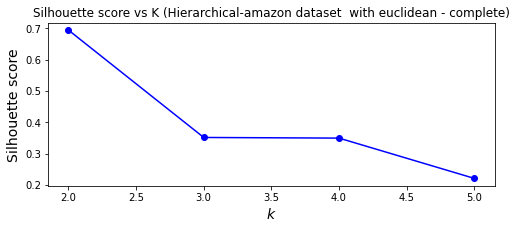

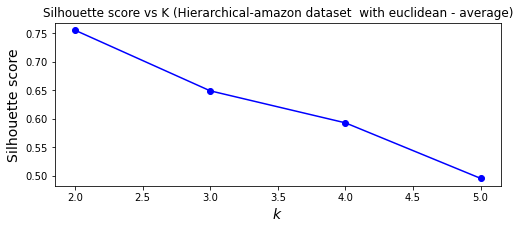

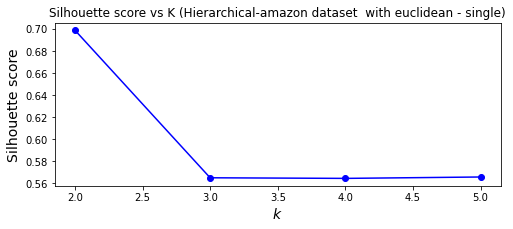

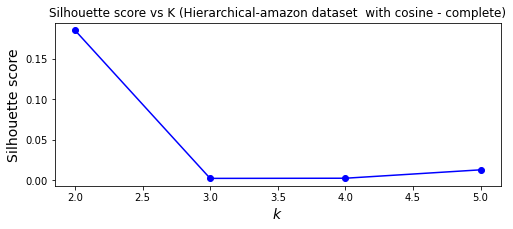

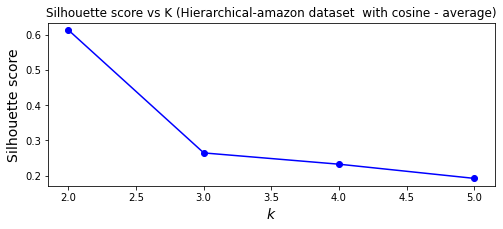

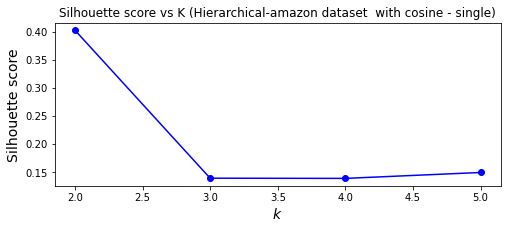

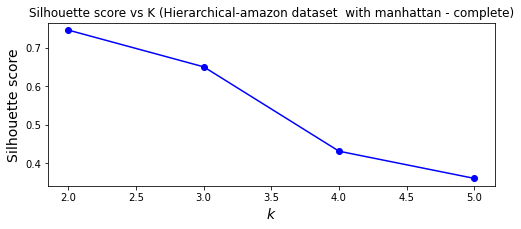

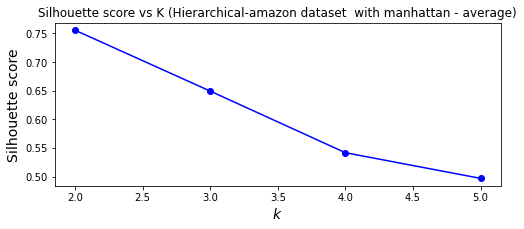

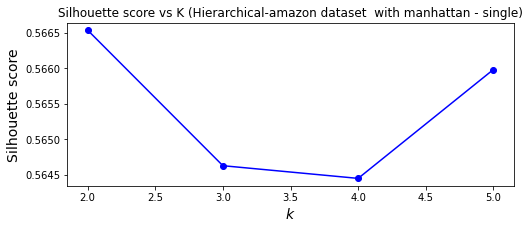

In [14]:
for i in affinity:
    for j in linkage:
        agglo_amazon = [cluster.FeatureAgglomeration(n_clusters=k,affinity=i,linkage=j ).fit(x4_amazon.T)
                        for k in range(2,6)]
        silhouette_scores10=[]
        for u in range(0,len( agglo_amazon)):
            thesilhouette_scores = silhouette_score(x4_amazon, agglo_amazon[u].labels_)
            silhouette_scores10.append(thesilhouette_scores)                   
        plt.figure(figsize=(8, 3))
        plt.plot(range(2, 6), silhouette_scores10, "bo-")
        plt.xlabel("$k$", fontsize=14)
        plt.ylabel("Silhouette score", fontsize=14)
        title='Silhouette score vs K (Hierarchical-amazon dataset  with %s - %s)' %(i, j)
        plt.title(title)
        plt.show()

one of the model(manhattan and single link ) yield high  Silhouette score with K=5 ,therefore i will evaluat this model with external evaluation . as well as the model with the highset score  

### The model with the highset score

### First evaluation

In [15]:
best_agglo_amazon=cluster.FeatureAgglomeration(n_clusters=2,affinity='manhattan',linkage='average' ).fit(x4_amazon.T)
labels8 = best_agglo_amazon.labels_
socer9_bouldin_score=davies_bouldin_score(x4_amazon, labels8)
print('Davies-Bouldin for  Hierarchical cluster for Amazon dataset::',socer9_bouldin_score)

Davies-Bouldin for  Hierarchical cluster for Amazon dataset:: 0.4137102136791404


### Second evalaution 

In [16]:
socer9_calinski_harabasz=metrics.calinski_harabasz_score(x4_amazon, labels8)
print('the calinski-harabasz for Hierarchical cluster for Amazon dataset:',socer9_calinski_harabasz)

the calinski-harabasz for Hierarchical cluster for Amazon dataset: 272.11437732046926


## The evaluation with external evaluation

In [31]:
best_agglo_amazon2=cluster.FeatureAgglomeration(n_clusters=5,affinity='manhattan',linkage='single' ).fit(x4_amazon.T)
labels8_2 = best_agglo_amazon2.labels_
new_labels_amazon=[x  -1 for x in new_labels_amazon] # the true label star from 1 to 5 and the 
#cluster labels start from 0 
adjusted_rand_score1=adjusted_rand_score(new_labels_amazon,labels8_2)
print('adjusted_rand_score for Hierarchical cluster for Amazon dataset:',adjusted_rand_score1)
homogeneity_completeness_v_measure1=homogeneity_completeness_v_measure(new_labels_amazon,labels8_2)
print('homogeneity_completeness_v_measure for Hierarchical cluster for Amazon dataset :',homogeneity_completeness_v_measure1)

adjusted_rand_score for Hierarchical cluster for Amazon dataset: -5.522657168062148e-08
homogeneity_completeness_v_measure for Hierarchical cluster for Amazon dataset : (0.0006586766557857418, 0.0923640257433498, 0.0013080253749347787)




---


# 4. DBSCAN Clustering

## 4.1 Dataset 1

### Train DBSCAN clustering 

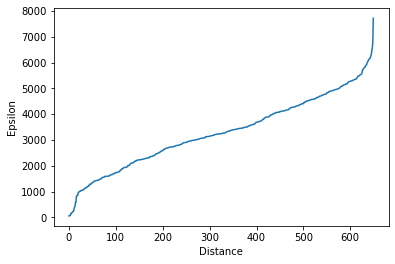

0.09514356567128325
-0.27989443942207914
-0.27989443942207914
0.09514356567128325
-0.27989443942207914


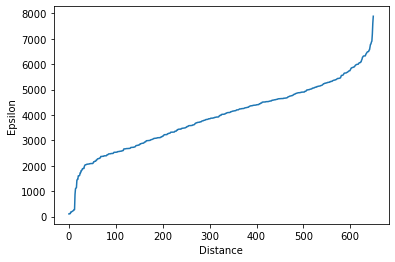

-0.010680657042364865
-0.010680657042364865


In [18]:
# this plot to show the best epsilon  value based on the NearestNeighbors distance and the epsilon value ,
#the best value for  epsilon  when the line increase sharply 
neigh=NearestNeighbors(n_neighbors=7)
distance=neigh.fit(x)
# indices and distance values
distances,indices=distance.kneighbors(x)
# Now sorting the distance increasing order
sorting_distances=np.sort(distances,axis=0)
# sorted distances
sorted_distances=sorting_distances[:,1]
plt.plot(sorted_distances)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()
# d
metric=['euclidean','manhattan','l1','l2','cityblock']
kclusterer5=[]
silhouette_score5=[]
for i in metric:
    DBSCAN_with_pca = DBSCAN(eps=5500, min_samples=5,metric=i).fit(x)
    lebal=DBSCAN_with_pca.labels_
    kclusterer5.append(lebal)
 
for k in kclusterer5:
    silhouette_scores_new =silhouette_score(x, k) 
    print(silhouette_scores_new)           
    silhouette_score5.append(silhouette_scores_new)

#%%


neigh=NearestNeighbors(n_neighbors=7)
distance=neigh.fit(x2)
# indices and distance values
distances,indices=distance.kneighbors(x2)
# Now sorting the distance increasing order
sorting_distances=np.sort(distances,axis=0)
# sorted distances
sorted_distances=sorting_distances[:,1]
plt.plot(sorted_distances)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()

#%%
kclusterer6=[]
silhouette_score6=[]
for i in metric:
    DBSCAN_without_pca = DBSCAN(eps=6000, min_samples=7,metric=i).fit(x2)
    lebal=DBSCAN_without_pca.labels_
    kclusterer6.append(lebal)
#%% 

silhouette_scores_new_1 =silhouette_score(x2,kclusterer6[0])
print(silhouette_scores_new_1)         

silhouette_scores_new_3 =silhouette_score(x2, kclusterer6[3])
print(silhouette_scores_new_3) 

### First evaluation

In [19]:
#the best paramters  are eps=5500, min_samples=7 without PCA
best_pca_DBSCAN=DBSCAN(eps=5500, min_samples=5).fit(x)
labels6 = best_pca_DBSCAN.labels_
n_clusters_ = len(set(labels6)) - (1 if -1 in labels6 else 0)
n_noise_ = list(labels6).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
socer5_bouldin_score=davies_bouldin_score(x, labels6)
print('Davies-Bouldin for DBSCAN cluster for yale dataset:',socer5_bouldin_score)

Estimated number of clusters: 3
Estimated number of noise points: 84
Davies-Bouldin for DBSCAN cluster for yale dataset: 2.400324479358885


### Second evaluation 

In [20]:
socer5_calinski_harabasz=metrics.calinski_harabasz_score(x, labels6)
print('calinski-harabasz for DBSCAN cluster for yale dataset:',socer5_calinski_harabasz)

calinski-harabasz for DBSCAN cluster for yale dataset: 17.55812677583059


## 4.2 Dataset 2

I tried to use  DBSCAN but I get very poor performance therefor I used  SpectralClustering for this part 

### Train SpectralClustering clustering 

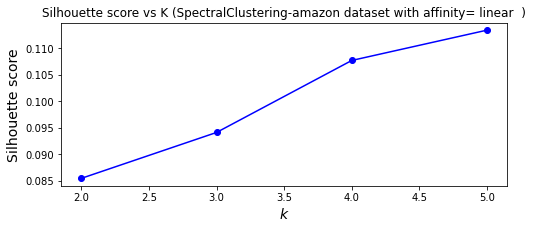

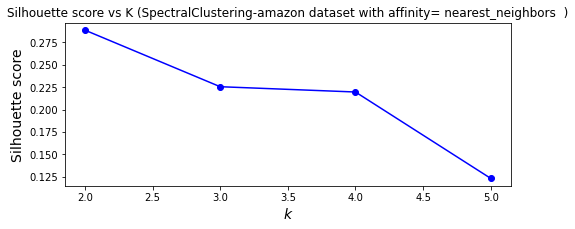

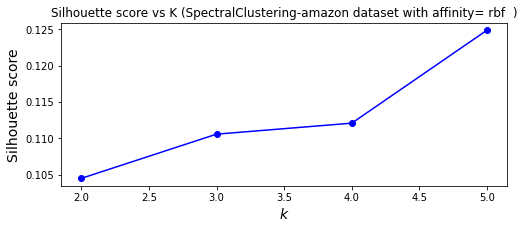

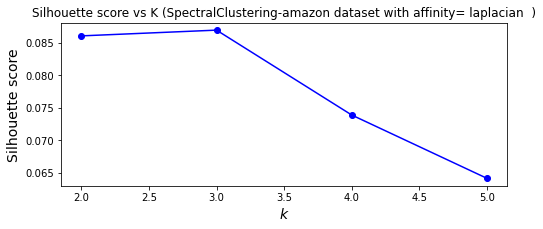

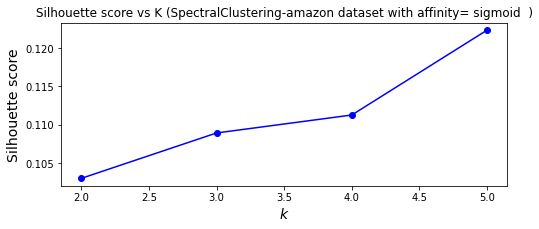

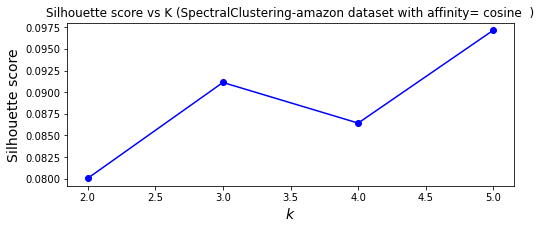

In [21]:
# the SpectralClustering is not using distance as similarity measure but it is using a kernel algorithm
# therefore , the affinity2 is a set of diffreint kernel algorithm
affinity2=[ 'linear','nearest_neighbors', 'rbf', 'laplacian', 'sigmoid', 'cosine'] 
for i in affinity2:
    SpectralClustering_amazon = [SpectralClustering(n_clusters=k,affinity=i).fit(x4_amazon)
                                 for k in range(2,7 )]
    silhouette_scores12=[]
    for u in range(1,len( SpectralClustering_amazon)):
        thesilhouette_scores = silhouette_score(x4_amazon, SpectralClustering_amazon[u].labels_)
        silhouette_scores12.append(thesilhouette_scores)                   
    plt.figure(figsize=(8, 3))
    plt.plot(range(2, 6), silhouette_scores12, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Silhouette score", fontsize=14)
    title='Silhouette score vs K (SpectralClustering-amazon dataset with affinity= %s  )' %i
    plt.title(title)
    plt.show()


### First evaluation 

In [22]:
best_SpectralClustering_amazon=SpectralClustering(n_clusters=2,affinity='nearest_neighbors').fit(x4_amazon)
labels9 = best_SpectralClustering_amazon.labels_
socer10_bouldin_score=davies_bouldin_score(x4_amazon, labels9)
print('Davies-Bouldin SpectralClustering cluster for Amazon dataset:',socer10_bouldin_score)

Davies-Bouldin SpectralClustering cluster for Amazon dataset: 0.7796447689049657


### Second evaluation 

In [23]:
socer10_calinski_harabasz=metrics.calinski_harabasz_score(x4_amazon, labels9)
print('calinski-harabasz SpectralClustering cluster for Amazon dataset:',socer10_calinski_harabasz)

calinski-harabasz SpectralClustering cluster for Amazon dataset: 340.86129562570295
